In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn import preprocessing
from model import *
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


## Preprocessing

### Normal

In [3]:
normal = pd.read_csv("datasets/SWaT/SWaT_Dataset_Normal_v1.csv", sep=',')
normal = normal.drop(["Timestamp", "Normal/Attack"], axis=1)
normal.shape

C:\Users\alexr\AppData\Local\Temp\ipykernel_27344\4111822205.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  normal = pd.read_csv("datasets/SWaT/SWaT_Dataset_Normal_v1.csv", sep=',')


(495000, 51)

In [4]:
# France uses commas as decimal separator; convert all columns into floats
for i in list(normal):
    normal[i] = normal[i].apply(lambda x: str(x).replace(',', '.'))
normal = normal.astype(float)

In [5]:
minmax_scaler = preprocessing.MinMaxScaler()

scaled = minmax_scaler.fit_transform(normal)
normal = pd.DataFrame(scaled)

In [6]:
normal.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.0,0.005294,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
1,0.0,0.005407,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
2,0.0,0.005520,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
3,0.0,0.005801,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
4,0.0,0.005576,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0


In [7]:
# no null values
normal[normal.isna().any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50


### Attack

In [8]:
attack = pd.read_csv("datasets/SWaT/SWaT_Dataset_Attack_v0.csv", sep=';')
labels = [float(label != 'Normal') for label in attack["Normal/Attack"]]
attack = attack.drop(["Timestamp", "Normal/Attack"], axis=1)
attack.shape

C:\Users\alexr\AppData\Local\Temp\ipykernel_27344\672767586.py:1: DtypeWarning: Columns (1,9,28,46) have mixed types. Specify dtype option on import or set low_memory=False.
  attack = pd.read_csv("datasets/SWaT/SWaT_Dataset_Attack_v0.csv", sep=';')


(449919, 51)

In [9]:
# France uses commas as decimal separator; convert all columns into floats
for i in list(attack):
    attack[i] = attack[i].apply(lambda x: str(x).replace(',', '.'))
attack = attack.astype(float)

In [10]:
scaled = minmax_scaler.transform(attack)
attack = pd.DataFrame(scaled)

In [11]:
attack.head(68)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.884144,0.577133,1.0,1.0,0.0,0.496158,0.188845,0.064088,0.982899,1.0,...,0.970903,1.0,0.0,0.946125,0.449782,0.944116,0.000073,0.0,0.0,0.0
1,0.891145,0.577190,1.0,1.0,0.0,0.496158,0.188845,0.064088,0.982899,1.0,...,0.970903,1.0,0.0,0.946125,0.449782,0.944521,0.000073,0.0,0.0,0.0
2,0.906779,0.577133,1.0,1.0,0.0,0.496158,0.186209,0.064088,0.981663,1.0,...,0.973530,1.0,0.0,0.946188,0.449782,0.944521,0.000073,0.0,0.0,0.0
3,0.923230,0.577302,1.0,1.0,0.0,0.496158,0.186209,0.064088,0.981663,1.0,...,0.973530,1.0,0.0,0.946188,0.449782,0.944197,0.000073,0.0,0.0,0.0
4,0.935947,0.578034,1.0,1.0,0.0,0.496158,0.186209,0.064088,0.981972,1.0,...,0.973530,1.0,0.0,0.946188,0.449782,0.943629,0.000073,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.956481,0.580569,1.0,1.0,0.0,0.496158,0.179622,0.062983,0.980787,1.0,...,0.967064,1.0,0.0,0.948631,0.449782,0.946874,0.000073,0.0,0.0,0.0
64,0.954614,0.579949,1.0,1.0,0.0,0.496158,0.179622,0.062983,0.980787,1.0,...,0.967064,1.0,0.0,0.948631,0.449782,0.946874,0.000073,0.0,0.0,0.0
65,0.950997,0.579442,1.0,1.0,0.0,0.496158,0.179622,0.062983,0.980941,1.0,...,0.967064,1.0,0.0,0.948631,0.449782,0.946874,0.000073,0.0,0.0,0.0
66,0.945397,0.578823,1.0,1.0,0.0,0.496158,0.179622,0.062983,0.981302,1.0,...,0.967064,1.0,0.0,0.948631,0.449782,0.946874,0.000073,0.0,0.0,0.0


In [12]:
# no null values
attack[attack.isna().any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50


In [13]:
window_size = 12
# window_size = 60

In [14]:
windows_normal = normal.values[np.arange(window_size)[None, :] + np.arange(normal.shape[0] - window_size)[:, None]]
windows_normal.shape

(494988, 12, 51)

In [15]:
windows_attack = attack.values[np.arange(window_size)[None, :] + np.arange(attack.shape[0] - window_size)[:, None]]
windows_attack.shape

(449907, 12, 51)

In [16]:
w_size = windows_normal.shape[1] * windows_normal.shape[2]
# z_size = 40 * windows_normal.shape[1]
z_size = 40

In [17]:
model = Usad(w_size, z_size).to(device)

## Dataloader

In [18]:
batch_size = 256
# batch_size = 7919

In [19]:
train_size = 0.8
val_size = 0.2

# val_size = 0.7
# test_size = 0.3

In [20]:
windows_normal = windows_normal.reshape((windows_normal.shape[0], -1))
windows_attack = windows_attack.reshape((windows_attack.shape[0], -1))

In [21]:
train_dataset, val_dataset = torch.utils.data.random_split(windows_normal, [train_size, val_size])
# # val_dataset, test_dataset = torch.utils.data.random_split(windows_attack, [val_size, test_size])
test_dataset = windows_attack


# windows_normal_train = windows_normal[:int(np.floor(.8 *  windows_normal.shape[0]))]
# windows_normal_val = windows_normal[int(np.floor(.8 *  windows_normal.shape[0])):int(np.floor(windows_normal.shape[0]))]

train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True
)

val_dataloader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False
)


In [22]:
# next(iter(train_dataloader)).shape

In [23]:
optimizer1 = torch.optim.Adam(list(model.encoder.parameters()) + list(model.decoder1.parameters()), lr=0.001)
optimizer2 = torch.optim.Adam(list(model.encoder.parameters()) + list(model.decoder2.parameters()), lr=0.001)

In [24]:
def training_step(model, train_dataloader, optimizer1, optimizer2, device, epoch):
    model.train()
    running_loss = np.array([0.0, 0.0])
    batch_bar = tqdm(total=len(train_dataloader), dynamic_ncols=True, leave=False, position=0, desc='Train')

    for iter_id, batch in enumerate(train_dataloader):
        batch = batch.to(dtype=torch.float32, device=device)

        (loss_AE1, loss_AE2) = model.training_phase(batch, epoch + 1)
        loss_AE1.backward()
        optimizer1.step()
        optimizer1.zero_grad()

        (loss_AE1, loss_AE2) = model.training_phase(batch, epoch + 1)
        loss_AE2.backward()
        optimizer2.step()
        optimizer2.zero_grad()
        
        running_loss[0] += loss_AE1.item()
        running_loss[1] += loss_AE2.item()

        batch_bar.set_postfix(
            loss_AE1="{:.04f}".format(running_loss[0] / (iter_id + 1)),
            loss_AE2="{:.04f}".format(running_loss[1] / (iter_id + 1))
        )
        batch_bar.update()

    batch_bar.close()
    return running_loss / len(train_dataloader)

In [25]:
def val_on_normal_dataset(model, val_dataloader, epoch, device):
    model.eval()
    AD_scores = []
    with torch.no_grad():
        for iter_id, batch in enumerate(val_dataloader):
            batch = batch.to(dtype=torch.float32, device=device)
            loss = model.training_phase(batch, epoch + 1)
            loss = [x.item() for x in loss]
            AD_scores.append(loss)
    AD_scores = np.array(AD_scores)

    return np.mean(AD_scores, axis=0)
    # return AD_scores / len(val_dataloader)

In [26]:
# val_on_normal_dataset(model, val_dataloader, 2, device)

In [27]:
alpha = 0.5
beta = 1.0 - alpha

In [28]:
def validation_step(model, val_dataloader):
    model.eval()
    AD_scores = []
    with torch.no_grad():
        for batch in val_dataloader:
            batch = batch.to(dtype=torch.float32, device=device)
            w1 = model.decoder1(model.encoder(batch))
            w2 = model.decoder2(model.encoder(w1))
            AD_scores.append(alpha*torch.mean((batch-w1)**2,axis=1)+beta*torch.mean((batch-w2)**2,axis=1))
            # AD_score = model.testing_phase(batch, alpha, beta)
            # AD_scores.append(AD_score)
            # for window in batch:
            #     AD_score = model.testing_phase(window, alpha, beta)
            #     AD_scores.append(AD_score)
    
    return AD_scores

In [29]:
running_losses = []
val_losses = []

for e in range(100):
    running_loss = training_step(model, train_dataloader, optimizer1, optimizer2, device, e)
    running_losses.append(running_loss)
    print(f"epoch: {e}, train_loss_AE1: {running_loss[0]}, train_loss_AE2: {running_loss[1]}")
    val_scores = val_on_normal_dataset(model, val_dataloader, e, device)
    val_losses.append(val_scores)
    print(f"val_loss_1: {val_scores[0]}, val_loss_2: {val_scores[1]}")

epoch: 0, train_loss_AE1: 0.005449150874367936, train_loss_AE2: 0.005111519080383852
val_loss_1: 0.0011089918943957091, val_loss_2: 0.0011238833004668914


epoch: 1, train_loss_AE1: 0.009912214838747964, train_loss_AE2: -0.006763645679304351
val_loss_1: 0.0022446027296915342, val_loss_2: -0.0009092140954242928


epoch: 2, train_loss_AE1: 0.00583267219589798, train_loss_AE2: -0.004638739739338198
val_loss_1: 0.00503795024955727, val_loss_2: -0.004180548123615849


epoch: 3, train_loss_AE1: 0.006853210848305222, train_loss_AE2: -0.005957286309302768
val_loss_1: 0.00784956190123846, val_loss_2: -0.007030884829140448


epoch: 4, train_loss_AE1: 0.05134152042460956, train_loss_AE2: -0.046845113513624005
val_loss_1: 0.06047907744074669, val_loss_2: -0.058690650017994624


epoch: 5, train_loss_AE1: 0.025539658034765766, train_loss_AE2: -0.023959583744922026
val_loss_1: 0.009932768416834046, val_loss_2: -0.009284997375763817


epoch: 6, train_loss_AE1: 0.008942639153888998, train_loss_AE2: -0.008278184365384815
val_loss_1: 0.02117525977720278, val_loss_2: -0.020026408441518782


epoch: 7, train_loss_AE1: 0.01882014037413931, train_loss_AE2: -0.018257136304357702
val_loss_1: 0.018301735011239845, val_loss_2: -0.017907755119721248


epoch: 8, train_loss_AE1: 0.02144003085281553, train_loss_AE2: -0.02055425810824499
val_loss_1: 0.02631416990967992, val_loss_2: -0.025162867773372382


epoch: 9, train_loss_AE1: 0.09498846709111775, train_loss_AE2: -0.0876841537363023
val_loss_1: 0.16244253200462005, val_loss_2: -0.15646376235540524


epoch: 10, train_loss_AE1: 0.1697754027597659, train_loss_AE2: -0.16690084345894007
val_loss_1: 0.17463473351888878, val_loss_2: -0.17207602921690435


epoch: 11, train_loss_AE1: 0.11149428833490352, train_loss_AE2: -0.10846904389507245
val_loss_1: 0.09931186155370347, val_loss_2: -0.09831931956054628


epoch: 12, train_loss_AE1: 0.10534014809532326, train_loss_AE2: -0.10423611848583203
val_loss_1: 0.12368372263680441, val_loss_2: -0.1202324585127584


epoch: 13, train_loss_AE1: 0.12867392015383947, train_loss_AE2: -0.1266434147722812
val_loss_1: 0.13107092898021372, val_loss_2: -0.13005422227065386


epoch: 14, train_loss_AE1: 0.13403528977399806, train_loss_AE2: -0.13256851386257196
val_loss_1: 0.1364243937709227, val_loss_2: -0.13577877608842628


epoch: 15, train_loss_AE1: 0.1381179214381139, train_loss_AE2: -0.13629543140732864
val_loss_1: 0.1388117600935066, val_loss_2: -0.133648163703985


epoch: 16, train_loss_AE1: 0.11196028000994813, train_loss_AE2: -0.10774833299388173
val_loss_1: 0.050755498098156555, val_loss_2: -0.04627408403951376


epoch: 17, train_loss_AE1: 0.038717312027917575, train_loss_AE2: -0.03597075768590513
val_loss_1: 0.02513461786704932, val_loss_2: -0.023756374684415122


epoch: 18, train_loss_AE1: 0.1363569661257301, train_loss_AE2: -0.12989526568672968
val_loss_1: 0.16415810923859747, val_loss_2: -0.1563543620728707


epoch: 19, train_loss_AE1: 0.13160141338801953, train_loss_AE2: -0.1279124329908093
val_loss_1: 0.12611656813119426, val_loss_2: -0.1195411165401301


epoch: 20, train_loss_AE1: 0.1397059534440984, train_loss_AE2: -0.13559439994091363
val_loss_1: 0.14058812828951103, val_loss_2: -0.13796399849483826


epoch: 21, train_loss_AE1: 0.14067555186666822, train_loss_AE2: -0.13827097387027185
val_loss_1: 0.1405969563996761, val_loss_2: -0.1383013001400063


epoch: 22, train_loss_AE1: 0.1411151701672353, train_loss_AE2: -0.13517662458502253
val_loss_1: 0.14100484777174563, val_loss_2: -0.1334566286444972


epoch: 23, train_loss_AE1: 0.14221739613901976, train_loss_AE2: -0.13423054559853437
val_loss_1: 0.14266224694498442, val_loss_2: -0.13401091056430678


epoch: 24, train_loss_AE1: 0.14275675743298138, train_loss_AE2: -0.13446717368801256
val_loss_1: 0.14279530411080796, val_loss_2: -0.1345040418149889


epoch: 25, train_loss_AE1: 0.142999905729263, train_loss_AE2: -0.13491711387460126
val_loss_1: 0.14313006324053426, val_loss_2: -0.13496564836927163


epoch: 26, train_loss_AE1: 0.14318592493851567, train_loss_AE2: -0.13535830943948157
val_loss_1: 0.1432174045294138, val_loss_2: -0.1354077103757119


epoch: 27, train_loss_AE1: 0.1438142227824072, train_loss_AE2: -0.13668587778315053
val_loss_1: 0.14388034171220251, val_loss_2: -0.1372970478171218


epoch: 28, train_loss_AE1: 0.1468936694279053, train_loss_AE2: -0.13858834823139576
val_loss_1: 0.14827157056454848, val_loss_2: -0.1391420270814452


epoch: 29, train_loss_AE1: 0.14848913779240233, train_loss_AE2: -0.1395655436888
val_loss_1: 0.14803410435061737, val_loss_2: -0.1395644062711287


epoch: 30, train_loss_AE1: 0.1478492997215884, train_loss_AE2: -0.1398594786582181
val_loss_1: 0.14698914143928263, val_loss_2: -0.1390594069193808


epoch: 31, train_loss_AE1: 0.1460364429543846, train_loss_AE2: -0.13867045852277998
val_loss_1: 0.1453775162844695, val_loss_2: -0.13858838799079876


epoch: 32, train_loss_AE1: 0.16617706736866397, train_loss_AE2: -0.1581389545219208
val_loss_1: 0.16986637691502732, val_loss_2: -0.16259387847835088


epoch: 33, train_loss_AE1: 0.1643012020286623, train_loss_AE2: -0.15692779319704003
val_loss_1: 0.16156701778256616, val_loss_2: -0.15389850119595688


epoch: 34, train_loss_AE1: 0.16713073444158397, train_loss_AE2: -0.15954912708664062
val_loss_1: 0.16582784441706439, val_loss_2: -0.15821682440372092


epoch: 35, train_loss_AE1: 0.16574054429549592, train_loss_AE2: -0.15834895567155763
val_loss_1: 0.1658813672318323, val_loss_2: -0.1584825876917334


epoch: 36, train_loss_AE1: 0.16579081568898274, train_loss_AE2: -0.15860059377680152
val_loss_1: 0.16592907035381602, val_loss_2: -0.15873398325702018


epoch: 37, train_loss_AE1: 0.16542534925086927, train_loss_AE2: -0.15872883133989962
val_loss_1: 0.16505107275891365, val_loss_2: -0.15838792931663898


epoch: 38, train_loss_AE1: 0.17022480090818792, train_loss_AE2: -0.1633786499769979
val_loss_1: 0.18464429880605496, val_loss_2: -0.17716733741667845


epoch: 39, train_loss_AE1: 0.18956930016461848, train_loss_AE2: -0.18226930964316718
val_loss_1: 0.19181576163269753, val_loss_2: -0.1845224190898028


epoch: 40, train_loss_AE1: 0.1919037626108664, train_loss_AE2: -0.18479939574723717
val_loss_1: 0.1918682729397017, val_loss_2: -0.18474905635651384


epoch: 41, train_loss_AE1: 0.19034158502498902, train_loss_AE2: -0.18346759125965983
val_loss_1: 0.19022417368814926, val_loss_2: -0.18338992795124842


epoch: 42, train_loss_AE1: 0.1898991848259644, train_loss_AE2: -0.18365413533269628
val_loss_1: 0.1893723296718696, val_loss_2: -0.18364107936081653


epoch: 43, train_loss_AE1: 0.18649962534808928, train_loss_AE2: -0.18096872417674037
val_loss_1: 0.18433854476734032, val_loss_2: -0.17885661702747493


epoch: 44, train_loss_AE1: 0.16146706398179167, train_loss_AE2: -0.15620282712334113
val_loss_1: 0.14914669454559798, val_loss_2: -0.14393144872915528


epoch: 45, train_loss_AE1: 0.1513583218484982, train_loss_AE2: -0.14618611872273257
val_loss_1: 0.15219715430138955, val_loss_2: -0.1469484299652336


epoch: 46, train_loss_AE1: 0.1520856231855591, train_loss_AE2: -0.1469537831539482
val_loss_1: 0.1522278791866253, val_loss_2: -0.14709091675527952


epoch: 47, train_loss_AE1: 0.15330825410855534, train_loss_AE2: -0.14822512680126454
val_loss_1: 0.153641783297832, val_loss_2: -0.1485469280826337


epoch: 48, train_loss_AE1: 0.15354654286357766, train_loss_AE2: -0.14856056742846926
val_loss_1: 0.15366926057702196, val_loss_2: -0.14867871310513764


epoch: 49, train_loss_AE1: 0.15357288133543232, train_loss_AE2: -0.14868678992497358
val_loss_1: 0.15369564144648323, val_loss_2: -0.14880483514732784


epoch: 50, train_loss_AE1: 0.15382302990249455, train_loss_AE2: -0.14902754179993674
val_loss_1: 0.15399009913437126, val_loss_2: -0.149191331609275


epoch: 51, train_loss_AE1: 0.15389596050064566, train_loss_AE2: -0.14918918992406566
val_loss_1: 0.15401976468951203, val_loss_2: -0.14930821427695204


epoch: 52, train_loss_AE1: 0.15540591543076804, train_loss_AE2: -0.1507830066532956
val_loss_1: 0.15678145719128986, val_loss_2: -0.15201714615643178


epoch: 53, train_loss_AE1: 0.15668805531131583, train_loss_AE2: -0.1520160434222175
val_loss_1: 0.15682325175258233, val_loss_2: -0.15214704400655218


epoch: 54, train_loss_AE1: 0.15717025891996309, train_loss_AE2: -0.15266948460607893
val_loss_1: 0.15790915023294838, val_loss_2: -0.1534121246762978


epoch: 55, train_loss_AE1: 0.15774315340371, train_loss_AE2: -0.15332803785145938
val_loss_1: 0.1578900159868467, val_loss_2: -0.15346965713556424


epoch: 56, train_loss_AE1: 0.1581921163553874, train_loss_AE2: -0.1538339650815891
val_loss_1: 0.15919123593842952, val_loss_2: -0.15457702738062049


epoch: 57, train_loss_AE1: 0.1619739498565023, train_loss_AE2: -0.15739030004241195
val_loss_1: 0.1623223509437354, val_loss_2: -0.15772750573256836


epoch: 58, train_loss_AE1: 0.16223313569367587, train_loss_AE2: -0.15771858285301027
val_loss_1: 0.16238756312264335, val_loss_2: -0.15785475691313583


epoch: 59, train_loss_AE1: 0.16181455735591588, train_loss_AE2: -0.15737050626265595
val_loss_1: 0.16151357286198195, val_loss_2: -0.15707243089528047


epoch: 60, train_loss_AE1: 0.16141170542626976, train_loss_AE2: -0.1570478819344378
val_loss_1: 0.16152920302494553, val_loss_2: -0.157161043980941


epoch: 61, train_loss_AE1: 0.1618765638521123, train_loss_AE2: -0.15757490668515658
val_loss_1: 0.16242644333254153, val_loss_2: -0.15810998873809204


epoch: 62, train_loss_AE1: 0.16210743564324911, train_loss_AE2: -0.1578649209442644
val_loss_1: 0.1612569337821438, val_loss_2: -0.1570137465030956


epoch: 63, train_loss_AE1: 0.1625559695050573, train_loss_AE2: -0.1584117929628763
val_loss_1: 0.16526724382734423, val_loss_2: -0.1611663512404267


epoch: 64, train_loss_AE1: 0.16499947610599577, train_loss_AE2: -0.16090409546300682
val_loss_1: 0.16461713654434343, val_loss_2: -0.16051026878430863


epoch: 65, train_loss_AE1: 0.16400739257768732, train_loss_AE2: -0.15997410152870836
val_loss_1: 0.1640745381360214, val_loss_2: -0.16003867044313316


epoch: 66, train_loss_AE1: 0.16275362336180946, train_loss_AE2: -0.15879916446433964
val_loss_1: 0.1627807279119812, val_loss_2: -0.15882464484804976


epoch: 67, train_loss_AE1: 0.15187468347467756, train_loss_AE2: -0.1481359108906834
val_loss_1: 0.14847025764234922, val_loss_2: -0.1447719137643967


epoch: 68, train_loss_AE1: 0.1476721879680001, train_loss_AE2: -0.14406462054177108
val_loss_1: 0.1482084821669014, val_loss_2: -0.1445837197223683


epoch: 69, train_loss_AE1: 0.14802602424726383, train_loss_AE2: -0.14445721801628048
val_loss_1: 0.1481421310695259, val_loss_2: -0.14457052541795626


epoch: 70, train_loss_AE1: 0.14812127325946312, train_loss_AE2: -0.1446015270837446
val_loss_1: 0.14918717333820747, val_loss_2: -0.14565091805402622


epoch: 71, train_loss_AE1: 0.1491036526353111, train_loss_AE2: -0.14559934285855247
val_loss_1: 0.14923287958907835, val_loss_2: -0.14571634058188407


epoch: 72, train_loss_AE1: 0.14911925526842734, train_loss_AE2: -0.1456568917884469
val_loss_1: 0.14918622628662936, val_loss_2: -0.14573479341752155


epoch: 73, train_loss_AE1: 0.1496024887621133, train_loss_AE2: -0.14619380687426659
val_loss_1: 0.15021044597299216, val_loss_2: -0.1467945265754557


epoch: 74, train_loss_AE1: 0.14598147922665672, train_loss_AE2: -0.1426827158554955
val_loss_1: 0.14193906829492683, val_loss_2: -0.13872343386482514


epoch: 75, train_loss_AE1: 0.13983088861801737, train_loss_AE2: -0.1367022678419784
val_loss_1: 0.13804771626026438, val_loss_2: -0.1349554223222634


epoch: 76, train_loss_AE1: 0.13623218894313055, train_loss_AE2: -0.1332110906117334
val_loss_1: 0.13577108558758286, val_loss_2: -0.1327603644948905


epoch: 77, train_loss_AE1: 0.14024722496193304, train_loss_AE2: -0.137241029592969
val_loss_1: 0.15093306388503822, val_loss_2: -0.14783756962426256


epoch: 78, train_loss_AE1: 0.15746373135618186, train_loss_AE2: -0.15417808489831863
val_loss_1: 0.14870533031394623, val_loss_2: -0.14540732996562347


epoch: 79, train_loss_AE1: 0.151908769538962, train_loss_AE2: -0.14901541937299134
val_loss_1: 0.15247790738747719, val_loss_2: -0.14967916012580387


epoch: 80, train_loss_AE1: 0.15243231924642034, train_loss_AE2: -0.14966244994630795
val_loss_1: 0.15249438102547205, val_loss_2: -0.14971144366479966


epoch: 81, train_loss_AE1: 0.15245471058657806, train_loss_AE2: -0.14971378850181719
val_loss_1: 0.1532556230168626, val_loss_2: -0.15053384202395298


epoch: 82, train_loss_AE1: 0.1507729224586148, train_loss_AE2: -0.14806372012025554
val_loss_1: 0.15064799685502853, val_loss_2: -0.14780583904541125


epoch: 83, train_loss_AE1: 0.1505344417801039, train_loss_AE2: -0.1477051614250918
val_loss_1: 0.15024844466561804, val_loss_2: -0.1474061956778361


epoch: 84, train_loss_AE1: 0.15021415445869324, train_loss_AE2: -0.14740621323113914
val_loss_1: 0.15026434509021058, val_loss_2: -0.14744863175914577


epoch: 85, train_loss_AE1: 0.1492779857124447, train_loss_AE2: -0.14650512435163462
val_loss_1: 0.1487181917102454, val_loss_2: -0.14598399581681235


epoch: 86, train_loss_AE1: 0.14963957407278788, train_loss_AE2: -0.14699284635055582
val_loss_1: 0.1512301840292391, val_loss_2: -0.14870869289380945


epoch: 87, train_loss_AE1: 0.15193661849924112, train_loss_AE2: -0.14945727804436096
val_loss_1: 0.1503186289423196, val_loss_2: -0.14792102798627021


epoch: 88, train_loss_AE1: 0.14936648003887035, train_loss_AE2: -0.14703018813073135
val_loss_1: 0.14952452854284637, val_loss_2: -0.14720470768228675


epoch: 89, train_loss_AE1: 0.14943930910299422, train_loss_AE2: -0.14716508376767887
val_loss_1: 0.14958034463477074, val_loss_2: -0.14730225730619997


epoch: 90, train_loss_AE1: 0.14854206082199803, train_loss_AE2: -0.1463223962954883
val_loss_1: 0.14747277414305882, val_loss_2: -0.14526598513588423


epoch: 91, train_loss_AE1: 0.14828512540692734, train_loss_AE2: -0.1460936130846248
val_loss_1: 0.14884812860371838, val_loss_2: -0.1466537778691728


epoch: 92, train_loss_AE1: 0.1474455153761021, train_loss_AE2: -0.1451799068323011
val_loss_1: 0.14766662523573992, val_loss_2: -0.14532284989221458


epoch: 93, train_loss_AE1: 0.14708850373355667, train_loss_AE2: -0.14476831252527145
val_loss_1: 0.14721640116638607, val_loss_2: -0.14489158421985862


epoch: 94, train_loss_AE1: 0.1470596673377653, train_loss_AE2: -0.14488678634089658
val_loss_1: 0.14852733324818526, val_loss_2: -0.1463696580062541


epoch: 95, train_loss_AE1: 0.14854114166982882, train_loss_AE2: -0.14643027902651234
val_loss_1: 0.14873658671243553, val_loss_2: -0.1466195900618876


epoch: 96, train_loss_AE1: 0.14869214721510468, train_loss_AE2: -0.14659974206318452
val_loss_1: 0.1487307907382955, val_loss_2: -0.14664511871584318


epoch: 97, train_loss_AE1: 0.14755580566086612, train_loss_AE2: -0.1455153660691008
val_loss_1: 0.14714435332043227, val_loss_2: -0.14511183978513228


epoch: 98, train_loss_AE1: 0.14723394197576187, train_loss_AE2: -0.14521574441394117
val_loss_1: 0.14740824857269455, val_loss_2: -0.14537611157087085


epoch: 99, train_loss_AE1: 0.14827174703459933, train_loss_AE2: -0.14626168447613486
val_loss_1: 0.1485279980247951, val_loss_2: -0.14651263641910653


In [38]:
torch.save({
    'encoder': model.encoder.state_dict(),
    'decoder1': model.decoder1.state_dict(),
    'decoder2': model.decoder2.state_dict()
}, "model.pth")

In [29]:
checkpoint = torch.load("model.pth")

model.encoder.load_state_dict(checkpoint['encoder'])
model.decoder1.load_state_dict(checkpoint['decoder1'])
model.decoder2.load_state_dict(checkpoint['decoder2'])

<All keys matched successfully>

In [31]:
# iter = iter(test_dataloader)

In [32]:
# one_window = next(iter(test_dataloader))

In [33]:
# print(one_window)     # this is the FIRST WINDOW in attack dataset

In [ ]:
# def test_one_window(model, window):
#     model.eval()
#     with torch.no_grad():
#         window = window.to(dtype=torch.float32, device=device)
#         AD_score = model.testing_phase(window, alpha, beta)
#         return AD_score
#     return

In [ ]:
# output = test_one_window(model, one_window)

In [30]:
def flatten_round_np(x):
    ret = torch.cat(x).flatten()
    ret = torch.round(ret, decimals=4)
    ret = ret.detach().cpu().numpy()
    return ret

In [31]:
full_train_dataloader = DataLoader(
    windows_normal,
    batch_size=batch_size,
    shuffle=False
)

In [32]:
train_scores = validation_step(model, full_train_dataloader)

In [33]:
train_scores = flatten_round_np(train_scores)

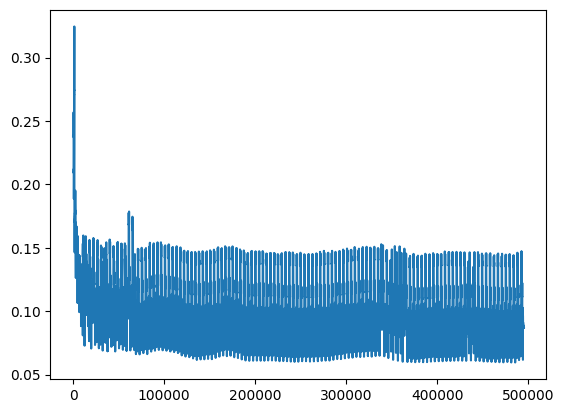

In [34]:
plt.plot(train_scores)

In [39]:
windows_labels = []
for i in range(len(labels) - window_size):
    windows_labels.append(list(np.int_(labels[i:i + window_size])))

In [40]:
print(len(windows_labels))
print(len(windows_labels[0]))

449907
12


In [41]:
y_test = [1.0 if (np.sum(window) > 0) else 0 for window in windows_labels]

In [ ]:
y_test[]

449907

In [44]:
next(i for i, v in enumerate(y_test) if v != 0)

1743

In [ ]:
test_scores = validation_step(model, test_dataloader)

In [36]:
test_scores = flatten_round_np(test_scores)

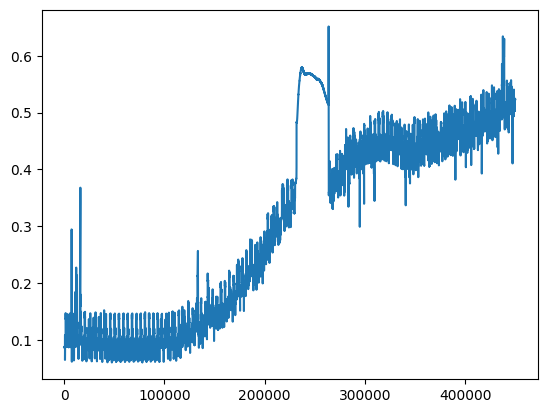

In [37]:
plt.plot(test_scores)
# plt.plot(test_scores_flat[4900:5500])

In [ ]:
test_scores[227800:263750]

array([0.3681, 0.3665, 0.3648, ..., 0.6701, 0.6714, 0.6733], dtype=float32)

In [ ]:
def validation_one_batch(model, batch):
    model.eval()
    AD_scores = []
    with torch.no_grad():
        batch = batch.to(dtype=torch.float32, device=device)
        w1 = model.decoder1(model.encoder(batch))
        w2 = model.decoder2(model.encoder(w1))
        AD_scores.append(alpha*torch.mean((batch-w1)**2,axis=1)+beta*torch.mean((batch-w2)**2,axis=1))
    
    return AD_scores

In [51]:
batch = next(iter(test_dataloader))

In [54]:
result = validation_one_batch(model, batch)

In [58]:
result = flatten_round_np(result)

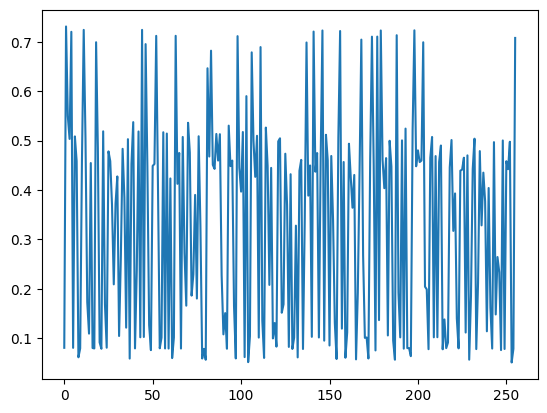

In [59]:
plt.plot(result)

In [51]:
normal_df = pd.read_csv("datasets/SWaT/SWaT_Dataset_Normal_v1.csv", sep=',')
normal_df.shape

C:\Users\alexr\AppData\Local\Temp\ipykernel_35228\2618999078.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  normal_df = pd.read_csv("datasets/SWaT/SWaT_Dataset_Normal_v1.csv", sep=',')


(495000, 53)

In [ ]:
normal_df.columns.get_loc('LIT301')

19

In [53]:
normal_df = normal_df.drop(["Timestamp", "Normal/Attack"], axis=1)

# France uses commas as decimal separator; convert all columns into floats
for i in list(normal_df):
    normal_df[i] = normal_df[i].apply(lambda x: str(x).replace(',', '.'))
normal_df = normal_df.astype(float)

In [59]:
print(normal_df['LIT301'].shape)

(495000,)


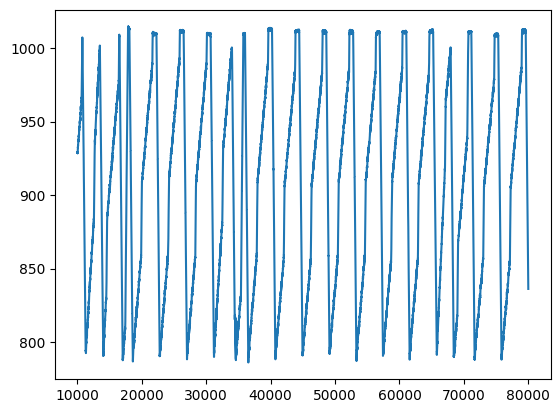

In [67]:
plt.plot(normal_df['LIT301'][10000:80000])